In [235]:
import numpy as np
import matplotlib.pyplot as plt

In [318]:
class GBM:
    def __init__(self, ticker: str):
        self.ticker = ticker
        self.value = None
        self.story = []
        self.story_t = []
        self.drift_n_vol = None


    def __init__(self, ticker: str, s0: float, drift: float, volatility: float):
        self.ticker = ticker
        self.value = s0
        self.story = [s0]
        self.story_t = [0]
        self.drift_n_vol = (drift, volatility)
    
    def get_ticker(self):
        return super().get_ticker()

    def get_value(self, r: float):
        return self.value
    
    def get_delta(self, r: float, ticker: str):
        if ticker == self.get_ticker():
            delta = 1
        else:
            delta = 0       
            
        return delta
    

    def get_vol(self):
        if self.drift_n_vol != None:
            return self.drift_n_vol[1]
        else:
            x = np.array(self.story)
            returns = np.diff(x) / x[:-1]

            # Calculate standard deviation of returns
            volatility = np.std(returns)
            return volatility
                
    def update_value(self, new_value:float, dt:float):
        self.story.append(new_value)
        last_t = self.story_t[-1]
        self.story_t.append(last_t + dt)
        self.value = new_value
        return None
    
    def advance(self, dt: float):
        if self.drift_n_vol != None:
            r, sigma = self.drift_n_vol
            
            S_t = self.value
            dW = np.random.normal(0,np.sqrt(dt))

            dS = (r*dt + sigma*dW)*S_t

            new_value = S_t + dS
            #new_value = X_t * np.exp( ( r-0.5*np.power(sigma,2) ) * dt + 
            #                    sigma*dW)
            
            self.update_value(new_value, dt)

        else:
            #TODO
            pass
        return None

In [371]:
class brownian_bridge:
    def __init__(self, T:float,S0:float = 0, ST:float = 0) -> None:
        self.T = T
        self.value = S0
        self.history = [self.value]
        self.history_t = [0]
        
        self.S0 = S0
        self.ST = ST

    def update_value(self, new_value:float, dt:float):
        self.history.append(new_value)
        last_t = self.history_t[-1]
        self.history_t.append(last_t + dt)
        self.value = new_value
        return None
    
    def advance(self, dt:float):
        ST = self.ST
        S0 = self.S0

        Y_t = self.value
        dW = np.random.normal(0,np.sqrt(dt))

        T = self.T
        t = self.history_t[-1]

        dY = -((Y_t-S0)/(T-t))*dt  + dW  

        
        
        
        #desired drift
        dY = dY + ((ST-S0)/(T-t))*dt
        
        new_value = Y_t + dY
        #new_value = dY
        self.update_value(new_value, dt)
    

8.02987386432892

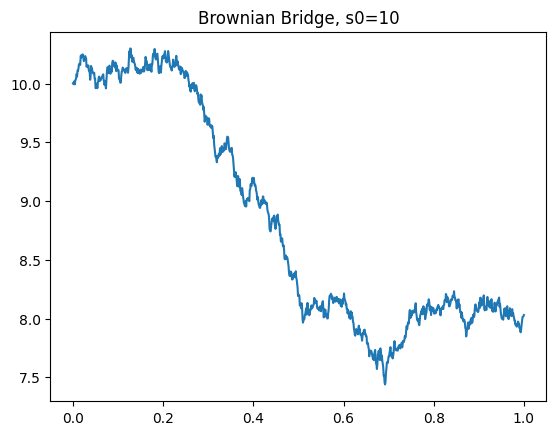

In [413]:
horizon = 1
N = 1000
dt = horizon/N

s0 = 10

bb = brownian_bridge(T=horizon, S0=s0, ST=s0-2)

#aple = GBM('AAPL', s0, 0.0035, 0.2)
aple = GBM('AAPL', 300, 0.015, 0.048)
for i in range(N):
    bb.advance(dt)
    aple.advance(dt)

#plt.plot(np.array(aple.story_t), np.array(aple.story))
#plt.title('GBM, s0={}'.format(s0))
#plt.show()
plt.plot(np.array(bb.history_t), np.array(bb.history))
plt.title('Brownian Bridge, s0={}'.format(s0))
bb.history[-1]
